-- Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- Output: Number of predicted wins (W)

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [10]:
bb= pd.read_csv('baseball.csv')

In [11]:
bb.head(4)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


In [15]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [18]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


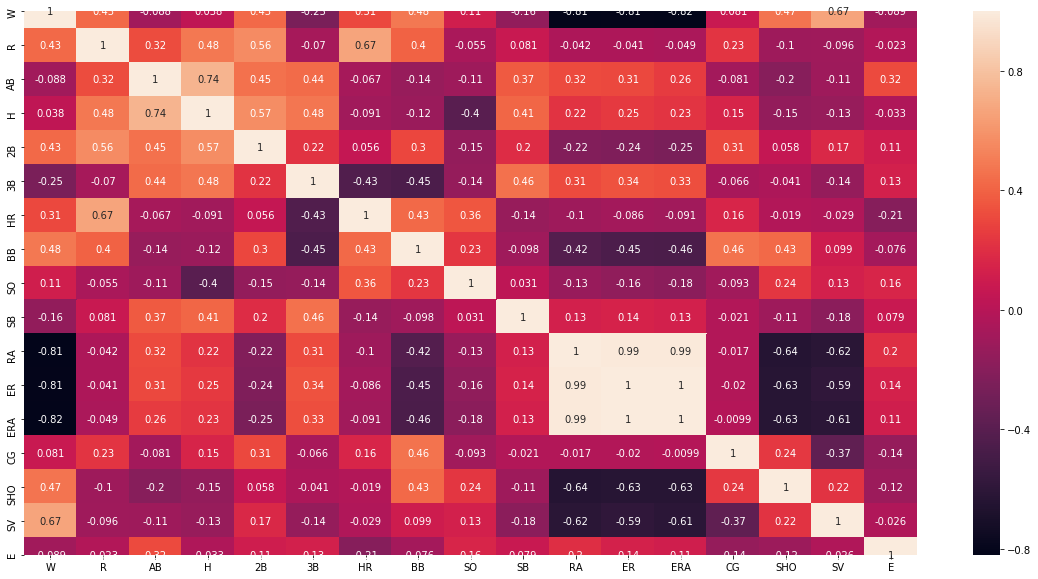

In [26]:
# Correlation of each other
plt.figure(figsize=(20,10))
corr_= bb.corr()
sns.heatmap(corr_, annot=True)
plt.show()

In [41]:
#Visualize/Analysis the outliers in each column 
def plot_feature(class_target, feature_set):
    for k, col in enumerate(bb.columns):
        plt.figure(k)
        sns.set(rc={'figure.figsize': (7,4)})
        sns.set(style="whitegrid")
        c_count=sns.boxplot(x=bb[col], hue=class_target, data=bb, color='yellow')

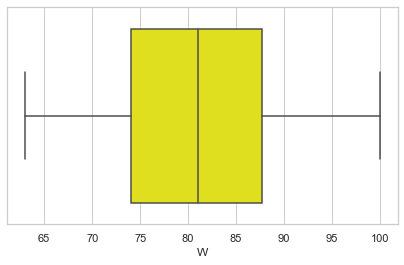

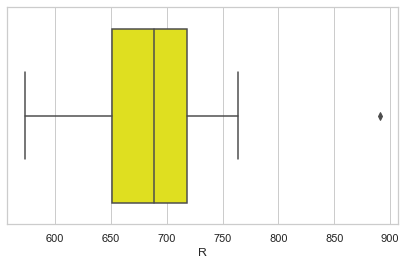

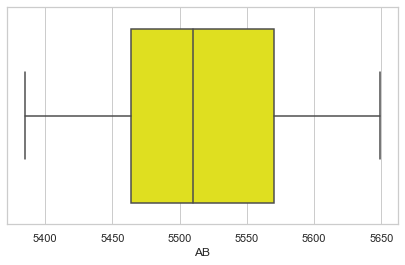

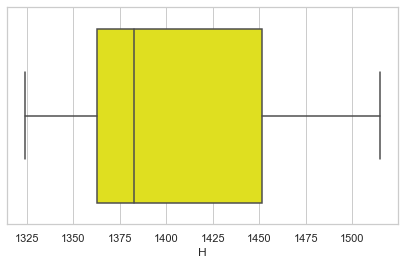

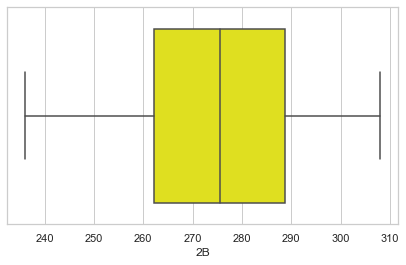

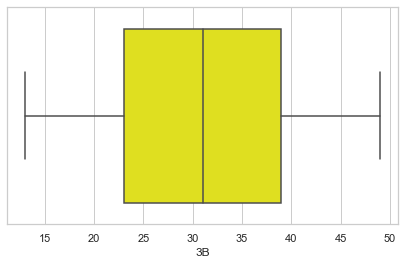

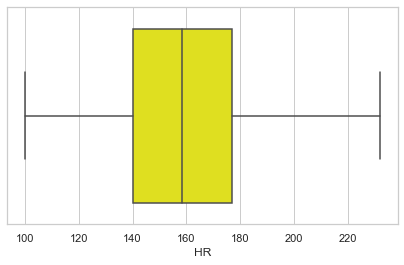

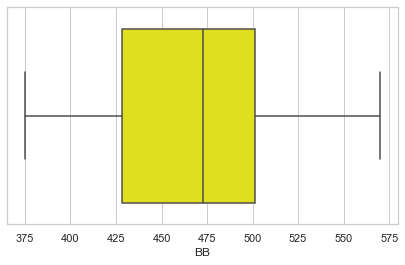

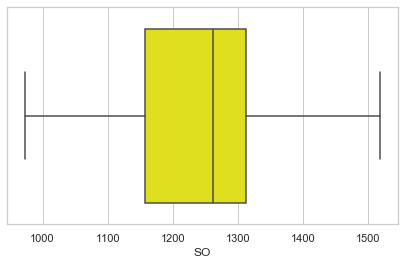

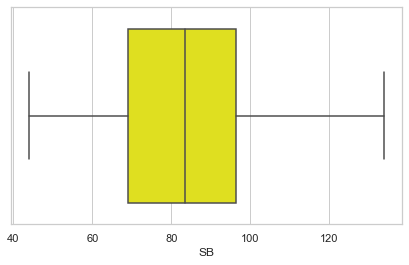

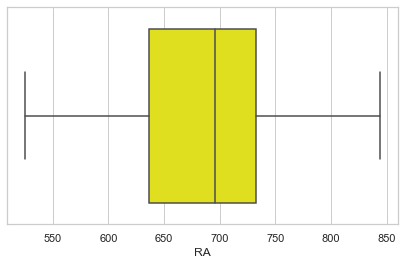

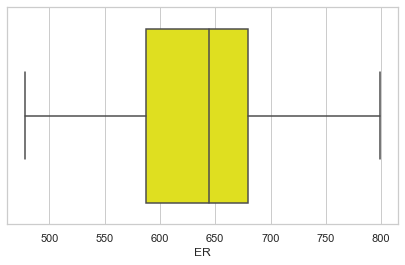

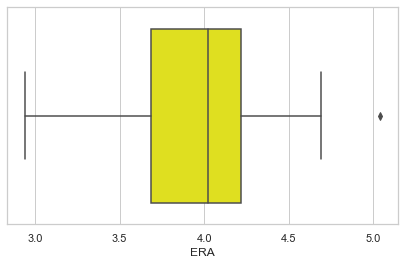

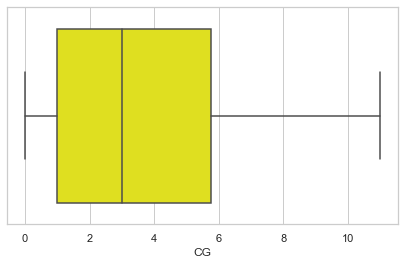

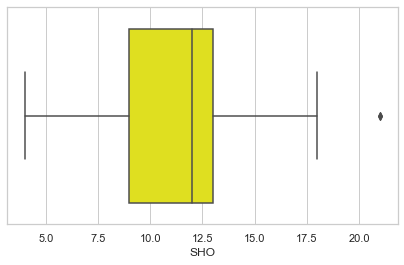

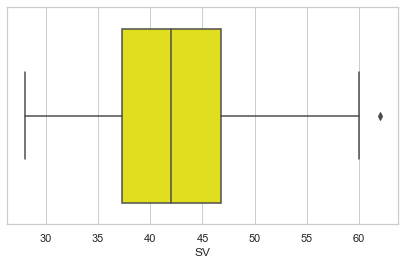

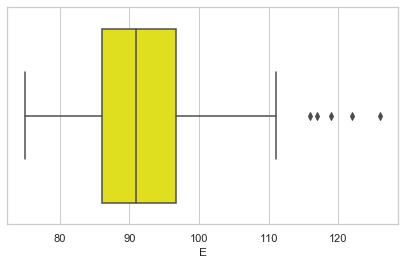

In [42]:
#Plot all graphs
class_=bb['W']
feature_=bb.drop('W', axis=1)
plot_feature(class_, feature_)

In [52]:
# Lets remove outlier from the data 
from scipy import stats
z = np.abs(stats.zscore(bb))
print(z)

threshold = 3
print(np.where(z > 3))

bb = bb[(z < 3).all(axis=1)]

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 5.39806195e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 5.39806195e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.77264091e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [60]:
# Lets look into presence of skewness
bb.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.908381
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [62]:
# Lets treat outliers (only in few columns)
bb['CG'] = np.log1p(bb['CG'])
bb['E'] = np.log1p(bb['E'])
bb['H'] = np.log1p(bb['H'])
bb['SV'] = np.log1p(bb['SV'])

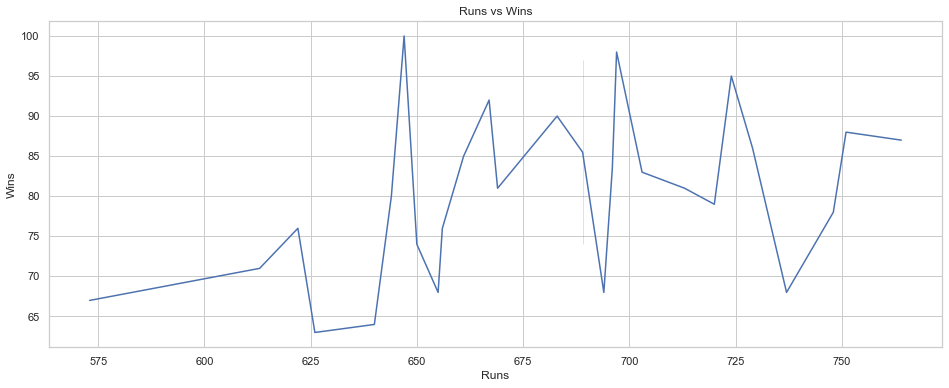

In [72]:
# Plot relationship between runs and wins
plt.figure(figsize=(16, 6))
sns.lineplot(x='R', y='W', data=bb)
plt.title("Runs vs Wins")
plt.xlabel("Runs")
plt.ylabel("Wins")
plt.show()

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import  Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [185]:
# Split features and target class from the dataset for the training purposes 
features_var = bb.drop('W', axis = 1)
target_var = bb['W'].values.reshape(-1,1)

In [186]:
standardScale = StandardScaler()
feature_var_std=standardScale.fit_transform(features_var)

In [187]:
standardScale = StandardScaler()
target_var_std=standardScale.fit_transform(target_var)

In [188]:
x_train, x_test, y_train, y_test = train_test_split(feature_var_std, target_var_std, test_size = 0.23, random_state=42)

In [189]:
# Lets find the the random state for random forest
max_r_score=0
for r_state in range(42,242):
    x_train, x_test, y_train, y_test = train_test_split(feature_var_std, target_var_std ,random_state = r_state,test_size=0.28)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    r2_=r2_score(y_test,y_pred)
    if r2_>max_r_score:
        max_r_score=r2_
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  129  is  0.8684411764705883


In [190]:
# Lets find the the random state for random forest
max_r_score=0
for r_state in range(42,242):
    x_train, x_test, y_train, y_test = train_test_split(feature_var_std, target_var_std ,random_state = r_state,test_size=0.28)
    gbr = GradientBoostingRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    r2_=r2_score(y_test,y_pred)
    if r2_>max_r_score:
        max_r_score=r2_
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  236  is  0.8493463722792093


In [202]:
#Define regression function
def apply_regression(clf, x_train, x_test, y_train, y_test):
    cv = KFold(n_splits=5, random_state=129)
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring="r2")
    print("Mean score of Cross Validation: ", scores.mean())
    print("Std of score of Cross Validation: ",scores.std())
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    # Visualizing the differences between actual total bike count and predicted total bike count
    sns.lineplot(y_test, y_pred, color='pink')
    plt.xlabel("Count")
    plt.ylabel("Predicted Count")
    plt.title("Total Bike Count vs Predicted Total Bike Count")
    plt.show()

In [203]:
rf = RandomForestRegressor(random_state =129)
apply_regression(rf, x_train, x_test, y_train, y_test)

Mean score of Cross Validation:  0.3802226316119011
Std of score of Cross Validation:  0.27021219057034374
Mean Absolute Error: 0.563537584720705
Mean Squared Error: 0.4599492100293909
Root Mean Squared Error: 0.6781955544158269


AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [196]:
gbr=GradientBoostingRegressor(random_state =236)
apply_regression(gbr, x_train, x_test, y_train, y_test) # Deviation from the mean is quite high in Gradient Boosting case.

Mean score of Cross Validation:  0.13536311773656662
Std of score of Cross Validation:  0.6353451312930574
Mean Absolute Error: 0.7925530952510365
Mean Squared Error: 0.8915725956950283
Root Mean Squared Error: 0.9442312194028687


In [197]:
r=Ridge()
apply_regression(r, x_train, x_test, y_train, y_test)  # Comparative to Boosting not much deviation (std) from mean

Mean score of Cross Validation:  0.3834856376122747
Std of score of Cross Validation:  0.24434461348137565
Mean Absolute Error: 0.41319776503229694
Mean Squared Error: 0.454594786197473
Root Mean Squared Error: 0.6742364468029542


In [198]:
knn=KNeighborsRegressor()
apply_regression(knn, x_train, x_test, y_train, y_test)

Mean score of Cross Validation:  0.5191034726278548
Std of score of Cross Validation:  0.14168003076549499
Mean Absolute Error: 0.6011067570354186
Mean Squared Error: 0.4555891594458912
Root Mean Squared Error: 0.6749734509192871


In [199]:
# Lastly Save the model for futher use
from sklearn.externals import joblib  
joblib.dump(r, 'baseball_win.pkl')

['baseball_win.pkl']